# To run the code below install GPy with "pip install GPy" 
# Note: the Numpy library should be numpy <=                     1.21.2
# it seems that the more recent versions of numpy crash with GPy.

The following plots demonstrate samples from a Gaussian process prior and the corresponding covariance matrix


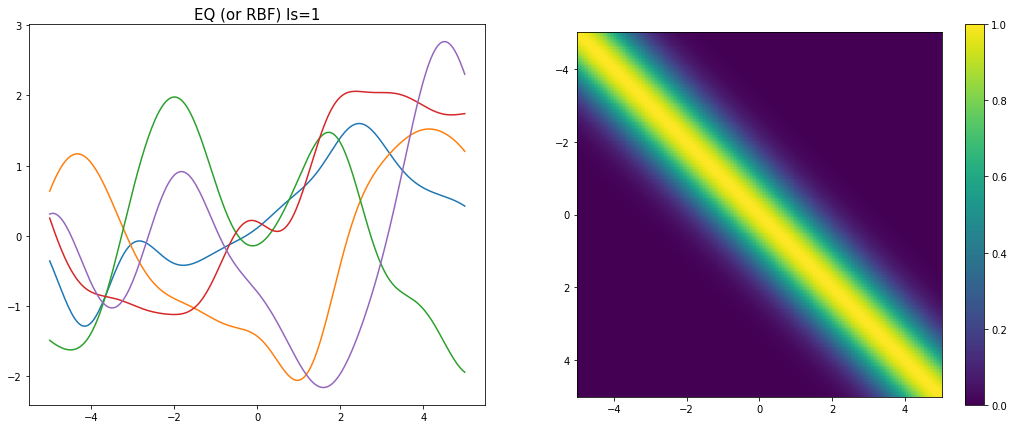

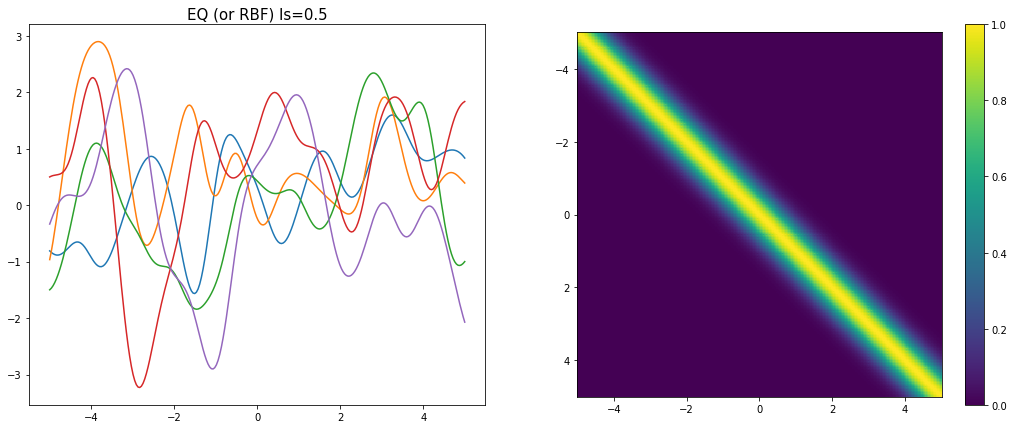

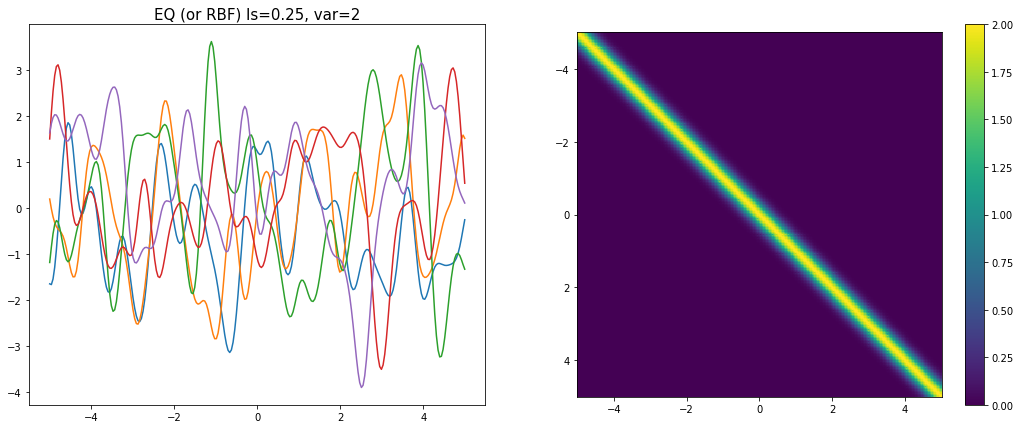

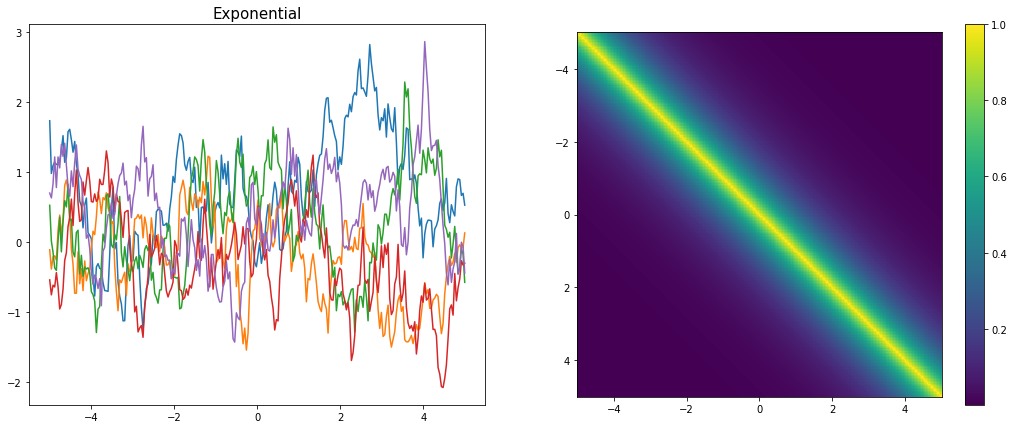

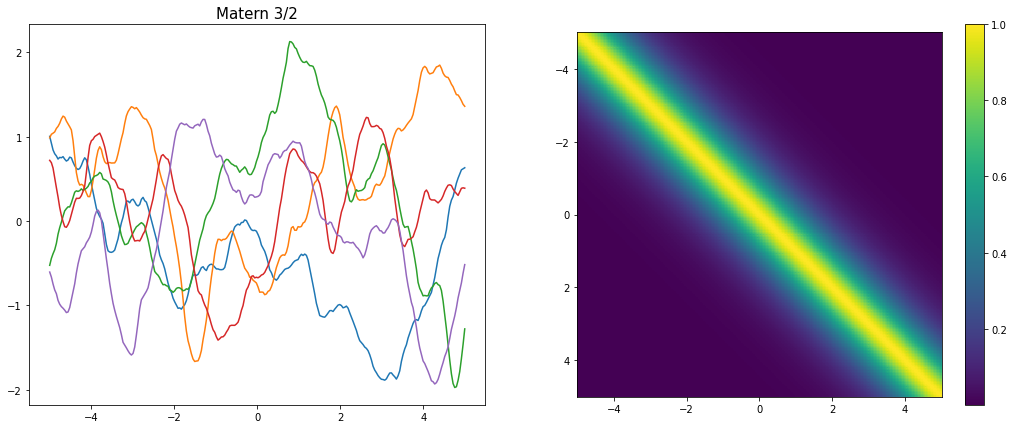

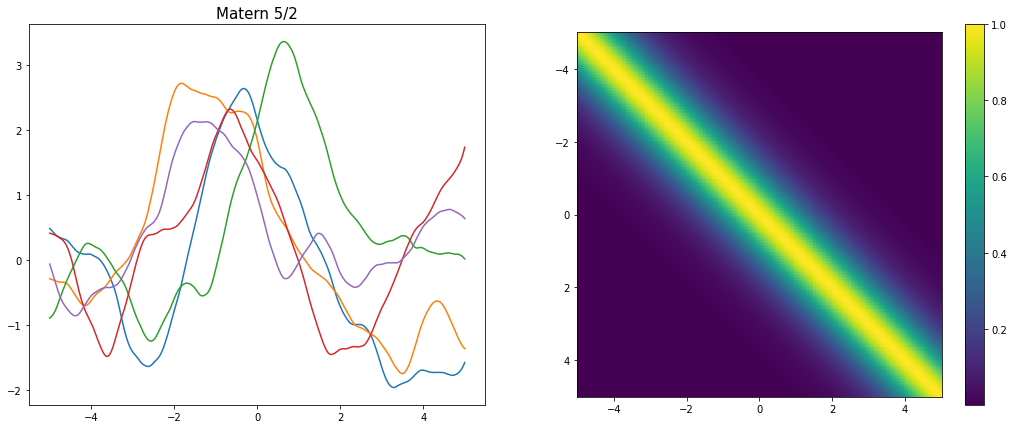

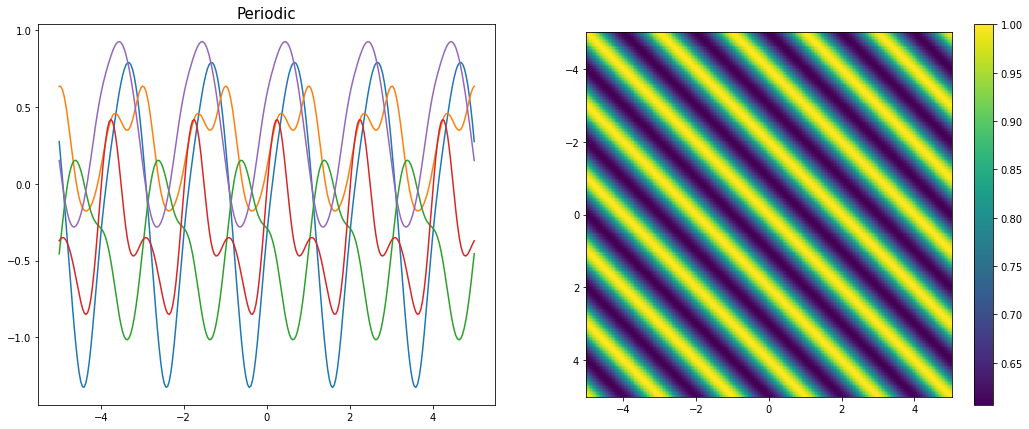

In [1]:
# Code taken from the Gaussian Processes Summer School
# https://gpss.cc/past_meetings.html

import numpy as np
import GPy
import matplotlib.pyplot as plt
ks = [ # List of example kernels
    GPy.kern.RBF(1, lengthscale=1.),
    GPy.kern.RBF(1, lengthscale=0.5),
    GPy.kern.RBF(1, lengthscale=0.25, variance=2.),
    GPy.kern.Exponential(1),
    GPy.kern.Matern32(1),
    GPy.kern.Matern52(1),
    GPy.kern.StdPeriodic(1, period=2.),
    GPy.kern.Cosine(1),
    GPy.kern.Brownian(1),
    GPy.kern.Linear(1),
    GPy.kern.Bias(1),
    GPy.kern.White(1),
    GPy.kern.StdPeriodic(1)*GPy.kern.RBF(1),
    GPy.kern.Linear(1) + GPy.kern.Exponential(1)
]
# The name of our kernels (for the legend)
kernel_name = ["EQ (or RBF) ls=1", "EQ (or RBF) ls=0.5", "EQ (or RBF) ls=0.25, var=2", "Exponential", "Matern 3/2", 
               "Matern 5/2", "Periodic", "Cosine", "Brownian", "Linear", "Bias", "White", "Periodic x RBF", "Linear + Exponential"]

# Our sample space
X = np.linspace(-5., 5., 250)[:, None]

print("The following plots demonstrate samples from a Gaussian process prior and the corresponding covariance matrix")

# Loop through our kernels
for i,k in enumerate(ks):
    # The mean function is set to 0
    mu = np.zeros((250)) # we have 250 sample inputs
    # Get the covariance matrix
    if i != 11:
        C  = k.K(X,X)
    else: # We have to sample White noise kernel differently
        C = k.K(X)
        
    # Sample 5 times from a multivariate Gaussian distribution with mean 0 and covariance k(X,X)
    Z  = np.random.multivariate_normal(mu, C, 5)
    
    # Setup figure environment
    plt.figure(figsize=(18, 7))
    
    # Show samples on left hand side
    plt.subplot(121)
    for j in range(5 if i < 11 else 2): # Loop through samples
        plt.plot(X[:],Z[j,:])
        plt.title(kernel_name[i],fontsize=15)
        
    # Visualise covariance matrix on right hand side
    plt.subplot(122)
    plt.pcolor(X.T, X, C)
    # Annotate plot
    plt.gca().invert_yaxis(), plt.gca().axis("image")
    plt.colorbar()
    if i >5:
        #Here I just put this break to only show the first 5 examples
        break